In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [280]:
iris=pd.read_csv(r'iris.csv')
iris.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [236]:
X = iris.iloc[:, [0, 1]].values 
y = iris["Species"]

In [238]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [240]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [227]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y_encoded,test_size=0.2,random_state=42)

In [242]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)

KNeighborsClassifier()

In [244]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8


In [246]:
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print("Labels:", list(le.classes_))
print(cm)



Confusion Matrix:
Labels: ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
[[10  0  0]
 [ 0  6  3]
 [ 0  3  8]]


In [286]:
h = 0.05
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(grid)
Z = Z.reshape(xx.shape)

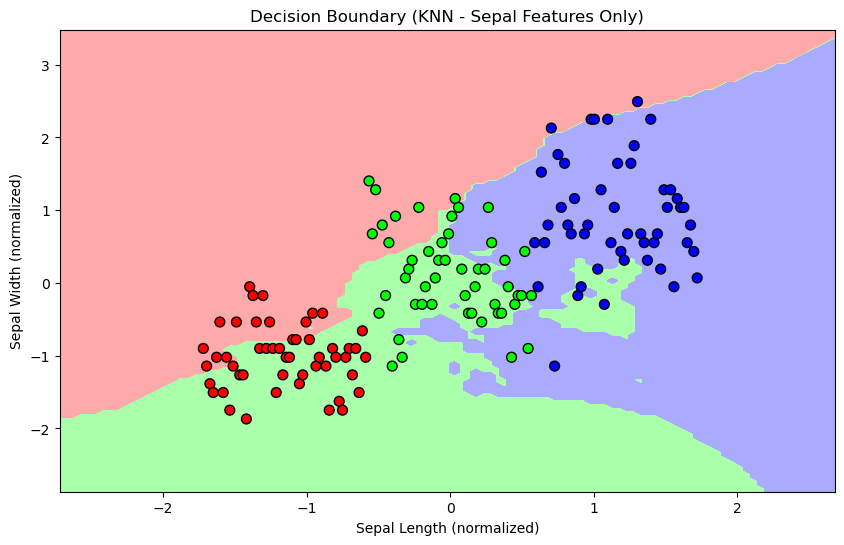

In [288]:
plt.figure(figsize=(10, 6))
cmap_background = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_points = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.contourf(xx, yy, Z, cmap=cmap_background)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_encoded, cmap=cmap_points, edgecolor='k', s=50)
plt.xlabel("Sepal Length (normalized)")
plt.ylabel("Sepal Width (normalized)")
plt.title("Decision Boundary (KNN - Sepal Features Only)")
plt.show()